In [ ]:
! git clone https://github.com/atik-05/Bangla_ABSA_Datasets.git

Cloning into 'Bangla_ABSA_Datasets'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (7/7), 365.69 KiB | 2.16 MiB/s, done.


In [ ]:
!pip install -q keras.utils
!pip install -q tensorflow

  Preparing metadata (setup.py) ... done


In [ ]:
# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints

In [ ]:
from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00


In [ ]:
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

In [ ]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub

In [ ]:
# neural
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

In [ ]:
#Metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [ ]:
restaurant_df = pd.read_excel('/content/Bangla_ABSA_Datasets/Restaurant.xlsx')

In [ ]:
restaurant_df

,SL,Text,Category,Polarity
0,0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",service,negative
1,1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",food,positive
2,2,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",anecdotes/miscellaneous,negative
3,3,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",food,positive
4,4,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,service,positive
...,...,...,...,...
2054,2108,"তাই এটি এখন একটি খুব আকর্ষণীয় স্থান,Toons সম্...",ambience,positive
2055,2109,একটি অ্যাভাইজার এবং ড্রিংক2 টি ফাইলের জন্য $ 1...,food,neutral
2056,2110,একটি অ্যাভাইজার এবং ড্রিংক2 টি ফাইলের জন্য $ 1...,price,neutral
2057,2111,"অংশ বিশাল ছিল,দাম বিশেষ কিছু না হলেও,",price,positive


In [ ]:
restaurant_df['Polarity'].isna().sum()

0

In [ ]:
restaurant_df['Polarity'][restaurant_df["Polarity"] == 'negative'] = 0
restaurant_df['Polarity'][restaurant_df["Polarity"] == 'positive'] = 1
restaurant_df['Polarity'][restaurant_df["Polarity"] == 'neutral'] = 2

<ipython-input-19-da4907ed5459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['Polarity'][restaurant_df["Polarity"] == 'negative'] = 0
<ipython-input-19-da4907ed5459>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['Polarity'][restaurant_df["Polarity"] == 'positive'] = 1
<ipython-input-19-da4907ed5459>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['Polarity'][restaurant_df["Polarity"] ==

In [ ]:
Aspects_term =restaurant_df['Polarity'].unique()
Aspects_term[:20]

array([0, 1, 2, 'conflict'], dtype=object)

In [ ]:
restaurant_df.drop(restaurant_df[restaurant_df.Polarity == 'conflict'].index, inplace = True)

In [ ]:
y=restaurant_df['Polarity'].values.astype(np.float32)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(restaurant_df,restaurant_df['Polarity'],stratify=restaurant_df['Polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(restaurant_df,y,stratify=restaurant_df['Polarity'], test_size=0.2, random_state=1)

In [ ]:
X_train.Text.size

1555

In [ ]:
# Display the shape of the target values!
y_train.shape

(1555,)

Bangla Embedding

In [ ]:
glove_file = open('/content/bn_glove.39M.300d.txt')
embeddings_index = dict()
for line in glove_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 17167 word vectors.


In [ ]:
NUM_WORDS = 100000 ## MAx of words to keep, based on word frequency.
EMBEDDING_SIZE = 128 ## the length of the Vector the will

In [ ]:
tokenizer = Tokenizer(NUM_WORDS)
tokenizer.fit_on_texts(list(X_train.Text))


# tokenizer.fit_on_texts(list(X_train.Text))
text_X_train_tokenized = tokenizer.texts_to_sequences(X_train.Text) # list of tokenized sentences
Aspect_X_train_tokenized = tokenizer.texts_to_sequences(X_train['Category'])#tokenized sentences
text_X_test_tokenized = tokenizer.texts_to_sequences(X_test.Text) # list of tokenized sentences
Aspect_X_test_tokenized = tokenizer.texts_to_sequences(X_test['Category']) # list of tokenized sentences
#Convert tokenized commnent to sequnces
# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

# padding the sequences
# X_train = pad_sequences(X_train, max_len, padding='post')
# X_test  = pad_sequences(X_test,  max_len, padding='post')

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)


embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

X_train shape: (1555, 4)
X_test shape:  (389, 4)


In [ ]:
max_len =  max([len(one_title) for one_title in text_X_train_tokenized])
max_len

51

In [ ]:
text_X_train_padded = pad_sequences(text_X_train_tokenized, maxlen=max_len)
aspect_X_train_padded = pad_sequences(Aspect_X_train_tokenized, maxlen=1)

text_X_test_padded = pad_sequences(text_X_test_tokenized, maxlen=max_len)
aspect_X_test_padded = pad_sequences(Aspect_X_test_tokenized, maxlen=1)

In [ ]:
aspect_X_train_padded[0]

array([0], dtype=int32)

In [ ]:
train_data =  [text_X_train_padded,aspect_X_train_padded]
test_data =   [text_X_test_padded,aspect_X_test_padded]

In [ ]:
type(train_data)

list

In [ ]:
test_data[1][0]

array([0], dtype=int32)

In [ ]:
Max_Len = max_len

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, return_attend_weight=True, **kwargs):
        self.supports_masking = True
        self.return_attend_weight = return_attend_weight
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1],), initializer='glorot_uniform', name='attention_weight')
        super(Attention, self).build(input_shape)

    def call(self, x, mask=None):
        e = K.squeeze(K.dot(x, K.expand_dims(self.W)), axis=-1)
        a = K.softmax(e)
        if mask is not None:
            mask = K.cast(mask, K.floatx())
            a = mask * a
            a = a / (K.epsilon() + K.sum(a, axis=1, keepdims=True))
        attended_input = K.batch_dot(a, x, axes=[1, 1])
        if self.return_attend_weight:
            return [attended_input, a]
        else:
            return attended_input

    def compute_output_shape(self, input_shape):
        if self.return_attend_weight:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[1])]
        else:
            return input_shape[0], input_shape[-1]


In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Bidirectional, Dense, Activation, concatenate, Multiply, RepeatVector, Lambda, Flatten, add
from tensorflow.keras.models import Model

def bilstm_attention(lstm_units=128):
    input_text = Input(shape=(max_len,))
    input_aspect = Input(shape=(1,))

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=max_len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=max_len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)
    repeat_aspect = RepeatVector(max_len)(aspect_embed)

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden_vecs, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(lstm_units, return_sequences=True, return_state=True))(input_concat)

    # Apply attention mechanism
    attend_weight, attend_output = Attention(return_attend_weight=True)(hidden_vecs)
    attend_hidden = Multiply()([hidden_vecs, attend_weight])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    forward_dense = Dense(lstm_units)(forward_h)
    backward_dense = Dense(lstm_units)(backward_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, forward_dense, backward_dense]))

    return Model([input_text, input_aspect], final_output)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.00001)

from tensorflow.keras.optimizers import Adam

model = bilstm_attention()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x=train_data, y=y_train, validation_data=(test_data, y_test), batch_size=32, epochs=20, callbacks=[learning_rate_reduction])




Epoch 1/20
49/49 [==============================] - 24s 366ms/step - loss: 1.2747 - accuracy: 0.6154 - val_loss: 0.8814 - val_accuracy: 0.6272 - lr: 0.0010
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 0.8914 - accuracy: 0.6289
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
49/49 [==============================] - 17s 357ms/step - loss: 0.8914 - accuracy: 0.6289 - val_loss: 0.8529 - val_accuracy: 0.6272 - lr: 0.0010
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.6283
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
49/49 [==============================] - 16s 320ms/step - loss: 0.7652 - accuracy: 0.6283 - val_loss: 0.8216 - val_accuracy: 0.6272 - lr: 1.0000e-04
Epoch 4/20
49/49 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.6296
Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-05.
49/49 [==============================] - 15s 309ms/ste

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
13/13 [==============================] - 1s 107ms/step - loss: 1.3070 - accuracy: 0.6992
test loss, test acc: [1.3070168495178223, 0.6992287635803223]
Accuracy of the model is -  69.92287635803223 %


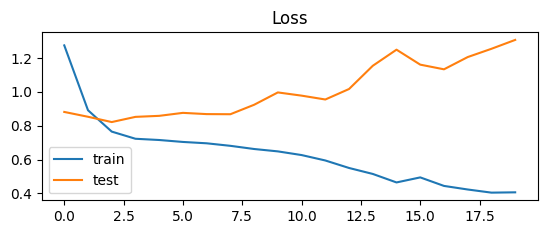

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training

In [ ]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Bidirectional, Dense, Activation, concatenate, Multiply, RepeatVector, Lambda, Flatten, add
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

def bilstm_attention_reg(lstm_units=128, reg_lambda=0.01):
    input_text = Input(shape=(max_len,))
    input_aspect = Input(shape=(1,))

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=max_len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=max_len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)
    repeat_aspect = RepeatVector(max_len)(aspect_embed)

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden_vecs, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(lstm_units, return_sequences=True, return_state=True))(input_concat)

    # Apply attention mechanism
    attend_weight, attend_output = Attention(return_attend_weight=True)(hidden_vecs)
    attend_hidden = Multiply()([hidden_vecs, attend_weight])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units, kernel_regularizer=regularizers.l2(reg_lambda))(attend_hidden)
    forward_dense = Dense(lstm_units, kernel_regularizer=regularizers.l2(reg_lambda))(forward_h)
    backward_dense = Dense(lstm_units, kernel_regularizer=regularizers.l2(reg_lambda))(backward_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, forward_dense, backward_dense]))

    return Model([input_text, input_aspect], final_output)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.00001)

from tensorflow.keras.optimizers import Adam

model = bilstm_attention_reg()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x=train_data, y=y_train, validation_data=(test_data, y_test), batch_size=32, epochs=20, callbacks=[learning_rate_reduction])




Epoch 1/20
49/49 [==============================] - 25s 348ms/step - loss: 9.4647 - accuracy: 0.3035 - val_loss: 7.1211 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 6.8318 - accuracy: 0.0283
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
49/49 [==============================] - 15s 311ms/step - loss: 6.8318 - accuracy: 0.0283 - val_loss: 6.2441 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 6.2228 - accuracy: 0.0000e+00
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
49/49 [==============================] - 16s 321ms/step - loss: 6.2228 - accuracy: 0.0000e+00 - val_loss: 6.1898 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/20
49/49 [==============================] - ETA: 0s - loss: 6.1870 - accuracy: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-05.
49/49 [=======================